In [ ]:
!uv pip install opencv-python opencv-python-headless

In [41]:
import cv2
import os
import numpy as np
from tqdm import tqdm
from pathlib import Path

def extract_frames_by_seconds(video_path, output_dir, seconds_interval=1):
    """
    Extract frames from a video file at specified time intervals.
    
    Args:
        video_path (Path or str): Path to the video file
        output_dir (Path or str): Directory to save extracted frames
        seconds_interval (float): Extract a frame every n seconds
    """
    # Convert to Path objects if they aren't already
    video_path = Path(video_path)
    output_dir = Path(output_dir)
    
    # Create output directory if it doesn't exist
    output_dir.mkdir(parents=True, exist_ok=True)
    
    # Open the video file
    video = cv2.VideoCapture(str(video_path))
    
    # Get video properties
    fps = video.get(cv2.CAP_PROP_FPS)
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps
    
    print(f"Video: {video_path}")
    print(f"FPS: {fps}")
    print(f"Frame count: {frame_count}")
    print(f"Duration: {duration:.2f} seconds")
    
    # Calculate frame interval based on seconds
    frame_interval = int(fps * seconds_interval)
    
    # Extract frames
    frame_idx = 0
    saved_count = 0
    image_prefix = Path(video_path).stem

    
    for _ in tqdm(range(frame_count), desc="Extracting frames"):
        ret, frame = video.read()
        if not ret:
            break
            
        if frame_idx % frame_interval == 0:
            # Calculate the timestamp in seconds
            timestamp = frame_idx / fps
            frame_path = output_dir / f"{image_prefix}_frame_{saved_count:06d}_{timestamp:.2f}s.jpg"
            cv2.imwrite(str(frame_path), frame)
            saved_count += 1
            
        frame_idx += 1
    
    video.release()
    print(f"Extracted {saved_count} frames to {output_dir} (one frame every {seconds_interval} second(s))")

# Process all videos in the video directory
video_dir = Path("video")  # Directory containing video files
output_dir = Path("extracted_frames")  # Directory to save extracted frames

# Create output directory if it doesn't exist
output_dir.mkdir(parents=True, exist_ok=True)

# Get all video files in the directory
video_extensions = ['.mp4', '.avi', '.mkv', '.mov']
video_files = [f for f in video_dir.iterdir() if f.is_file() and 
               any(f.name.lower().endswith(ext) for ext in video_extensions)]

print(f"Found {len(video_files)} video files in {video_dir}")

# Process each video file
for video_path in video_files:
    # Create a subdirectory for each video using the video filename
    video_output_dir = output_dir
    
    print(f"\nProcessing video: {video_path.name}")
    # Extract one frame every 1 second
    extract_frames_by_seconds(video_path, video_output_dir, seconds_interval=1)


Found 10 video files in video

Processing video: Movie_7.mkv
Video: video/Movie_7.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 185.17it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_6.mkv
Video: video/Movie_6.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 194.25it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_4.mkv
Video: video/Movie_4.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 190.28it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_5.mkv
Video: video/Movie_5.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 189.30it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_1.mkv
Video: video/Movie_1.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 195.67it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_2.mkv
Video: video/Movie_2.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 190.01it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_3.mkv
Video: video/Movie_3.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 194.93it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_10.mkv
Video: video/Movie_10.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 197.38it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_8.mkv
Video: video/Movie_8.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:02<00:00, 201.05it/s]


Extracted 61 frames to extracted_frames (one frame every 1 second(s))

Processing video: Movie_9.mkv
Video: video/Movie_9.mkv
FPS: 10.0
Frame count: 601
Duration: 60.10 seconds


Extracting frames: 100%|██████████| 601/601 [00:03<00:00, 195.82it/s]

Extracted 61 frames to extracted_frames (one frame every 1 second(s))


In [ ]:
!uv pip install ultralytics inference'[yolo-world]' "git+https://github.com/openai/CLIP.git"

In [ ]:
from ultralytics import YOLO
from inference.models.yolo_world.yolo_world import YOLOWorld
import supervision as sv
import cv2

# Initialize a YOLO-World model
model = YOLOWorld(model_id='yolo_world/v2-x')  # or select yolov8m/l-world.pt

Creating inference sessions


2025-04-25 00:09:33.438529 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 17 number of nodes in the graph: 985 number of nodes supported by CoreML: 43


CLIP model loaded in 1.78 seconds


2025-04-25 00:09:34.720817 [W:onnxruntime:, helper.cc:83 IsInputSupported] CoreML does not support input dim > 16384. Input:token_embedding.weight, shape: {49408,512}
2025-04-25 00:09:34.721070 [W:onnxruntime:, coreml_execution_provider.cc:112 GetCapability] CoreMLExecutionProvider::GetCapability, number of partitions supported by CoreML: 15 number of nodes in the graph: 1003 number of nodes supported by CoreML: 32


In [46]:
import os
from pathlib import Path
import glob
from tqdm import tqdm
import cv2
import supervision as sv

# Directory containing extracted frames
image_dir = "extracted_frames"
# Directory to save labels
labels_dir = "labels"

# Create labels directory if it doesn't exist
os.makedirs(labels_dir, exist_ok=True)

# Define classes
classes = ["pig"]
# Set classes for the model
model.set_classes(classes)

# Get all image files in the directory
image_files = glob.glob(f"{image_dir}/*.jpg") + glob.glob(f"{image_dir}/*.png")
print(f"Found {len(image_files)} images to process")

# Process each image with progress bar
for image_path in tqdm(image_files, desc="Processing images", unit="image"):
    # Get base filename without extension
    base_name = os.path.basename(image_path).split('.')[0]
    
    # Run inference on the image
    results = model.infer(image_path, text=classes, confidence=0.1)
    
    # Convert detections to YOLO format and save to txt file
    detections = sv.Detections.from_inference(results)
    
    # Create label file path
    label_path = os.path.join(labels_dir, f"{base_name}.txt")
    
    # Open file for writing
    with open(label_path, 'w') as f:
        if len(detections.xyxy) > 0:
            # Get image dimensions for normalization
            img = cv2.imread(image_path)
            img_height, img_width = img.shape[:2]
            
            # Write each detection to file in YOLO format: class x_center y_center width height
            for i in range(len(detections.xyxy)):
                x1, y1, x2, y2 = detections.xyxy[i]
                class_id = detections.class_id[i]
                
                # Convert to pixel coordinates (integers)
                x_center = int((x1 + x2) / 2)
                y_center = int((y1 + y2) / 2)
                width = int(x2 - x1)
                height = int(y2 - y1)
                
                # Write to file
                f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print(f"Completed processing {len(image_files)} images. Labels saved to {labels_dir}/")

Found 610 images to process


Processing images: 100%|██████████| 610/610 [04:11<00:00,  2.42image/s]

Completed processing 610 images. Labels saved to labels/


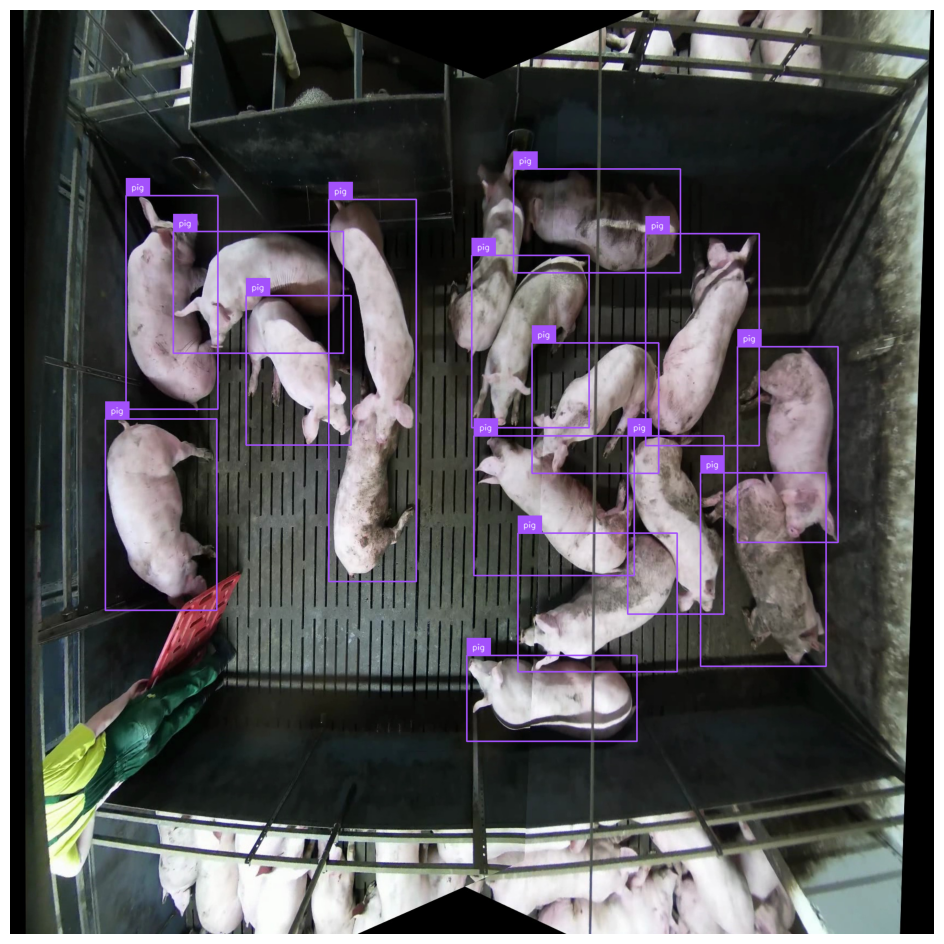

In [47]:
image = cv2.imread(image_path)

detections = sv.Detections.from_inference(results)

bounding_box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

labels = [classes[class_id] for class_id in detections.class_id]

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections
)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels
)

sv.plot_image(annotated_image)